In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [11]:
def load_artifact(targ_file:str):
    targ_path = os.path.join(dir,targ_file)

    with open(targ_path,'rb') as fp:
        test_artifact = pickle.load(fp)

    return test_artifact

In [12]:
# Each time that you initialize Dagster a new temporary folder is created.
# For the porpuse of this exercise we will save data in that temporary folder.
# Substitute tmp*** with your folder (you can fin it in this repo).
dir = "../tmp8400tun6/storage/"

`core_data`

| Feature Name           | Description                                                  |
|------------------------|--------------------------------------------------------------|
| rating_account_id      | Unique identifier for the contract account                    |
| customer_id            | Unique identifier for the customer                           |
| age                    | Age of the customer                                          |
| contract_lifetime_days | Total duration of the customer contract in days              |
| remaining_binding_days | Number of days left in the contract binding period - usual binding period is 2 years        |
| has_special_offer      | Indicates if the customer has a special offer      |
| is_magenta1_customer   | Indicates if the customer is part of the Magenta1 program - fedelty program    |
| available_gb           | Amount of mobile data included in the current tariff         |
| gross_mrc              | Gross monthly recurring charge (in euros)                    |
| smartphone_brand       | Brand of the customer’s smartphone                           |
| has_done_upselling     | Whether the customer has already done an upsell in the last 3 years      |


In [13]:
core_data = load_artifact("core_data")
core_data

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling
0,865702,3.161250,45,813,-619,0,0,20,12.96,Samsung,0
1,154152,4.220152,38,847,75,1,0,0,64.69,iPhone,0
2,837792,4.308332,28,675,309,0,1,None,44.80,iPhone,0
3,819351,3.842810,31,183,-18,0,1,0,70.00,iPhone,0
4,157550,2.656471,43,1094,299,0,0,0,39.49,Samsung,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,281188,3.428894,78,1422,-369,0,0,None,24.90,Samsung,0
99996,780756,1.163812,97,1651,-142,0,0,0,10.31,iPhone,0
99997,948682,1.288863,87,1648,331,0,0,0,20.92,iPhone,0
99998,174087,5.491399,100,1465,-370,1,0,0,50.10,Samsung,0


`usage_info`

| Feature Name           | Description                                                  |
|------------------------|--------------------------------------------------------------|
| rating_account_id      | Unique identifier for the contract account                    |
| billed_period_month_d  | Billing period (monthly)                                     |
| has_used_roaming       | Indicates if roaming was used during the period            |
| used_gb                | Amount of mobile data used in the billing period (in GB)     |


In [14]:
usage_info = load_artifact("usage_info")
usage_info

,rating_account_id,billed_period_month_d,has_used_roaming,used_gb
0,865702,2024-04-01,0,0.8
1,865702,2024-05-01,0,0.2
2,865702,2024-06-01,0,0.7
3,865702,2024-07-01,0,0.8
4,154152,2024-04-01,0,0.1
...,...,...,...,...
399995,174087,2024-07-01,0,37.8
399996,196011,2024-04-01,0,60.4
399997,196011,2024-05-01,1,25.3
399998,196011,2024-06-01,0,47.8


`customer_interactions`

| Feature Name   | Description                                                              |
|----------------|--------------------------------------------------------------------------|
| customer_id    | Unique identifier for the customer                                       |
| type_subtype   | Category and subtype of the interaction (e.g., tariff change, billing)   |
| n              | Number of interactions of this type in the last 6 months                                |
| days_since_last| Number of days since the last interaction of this type                   |


In [15]:
customer_interactions = load_artifact("customer_interactions")
customer_interactions

,customer_id,type_subtype,n,days_since_last
0,1.707725,prolongation,2,2
1,4.677077,rechnungsanfragen,1,166
2,4.677077,prolongation,3,21
3,4.677077,produkte&services-tarifdetails,3,17
4,5.201895,rechnungsanfragen,1,62
...,...,...,...,...
63020,2.818859,produkte&services-tarifwechsel,3,142
63021,2.818859,produkte&services-tarifdetails,3,131
63022,1.357642,prolongation,1,123
63023,1.357642,produkte&services-tarifwechsel,2,61


In [16]:
def load_artifact(artifact_name: str, storage_dir="../tmp8400tun6/storage/"):
    """
    Load artifacts that were materialized by Dagster
    
    Args:
        artifact_name: Name of the asset
        storage_dir: Dagster storage directory
    """
    artifact_path = os.path.join(storage_dir, artifact_name)
    
    if not os.path.exists(artifact_path):
        print(f"Asset '{artifact_name}' not found at {artifact_path}")
        print(f"Make sure you've materialized this asset in Dagster UI first")
        return None
    
    with open(artifact_path, 'rb') as fp:
        artifact = pickle.load(fp)
    
    print(f"Loaded: {artifact_name}")
    return artifact

In [17]:
# Load raw data
core_data = load_artifact("core_data")
usage_info = load_artifact("usage_info")
customer_interactions = load_artifact("customer_interactions")

# Load exploration results
data_exploration_summary = load_artifact("data_exploration_summary")
upsell_analysis_by_segments = load_artifact("upsell_analysis_by_segments")


Loaded: core_data
Loaded: usage_info
Loaded: customer_interactions
Loaded: data_exploration_summary
Loaded: upsell_analysis_by_segments


In [18]:
if core_data is not None:
    print(f"\nCORE DATA")
    print(f"   Shape: {core_data.shape}")
    print(f"   Unique Accounts: {core_data['rating_account_id'].nunique():,}")
    print(f"   Unique Customers: {core_data['customer_id'].nunique():,}")
    print(f"   Columns: {list(core_data.columns)}")

if usage_info is not None:
    print(f"\nUSAGE INFO")
    print(f"   Shape: {usage_info.shape}")
    print(f"   Unique Accounts: {usage_info['rating_account_id'].nunique():,}")
    print(f"   Billing Periods: {sorted(usage_info['billed_period_month_d'].unique())}")

if customer_interactions is not None:
    print(f"\nCUSTOMER INTERACTIONS")
    print(f"   Shape: {customer_interactions.shape}")
    print(f"   Unique Customers: {customer_interactions['customer_id'].nunique():,}")
    print(f"   Interaction Types: {customer_interactions['type_subtype'].unique().tolist()}")


CORE DATA
   Shape: (100000, 11)
   Unique Accounts: 100,000
   Unique Customers: 58,721
   Columns: ['rating_account_id', 'customer_id', 'age', 'contract_lifetime_days', 'remaining_binding_days', 'has_special_offer', 'is_magenta1_customer', 'available_gb', 'gross_mrc', 'smartphone_brand', 'has_done_upselling']

USAGE INFO
   Shape: (400000, 4)
   Unique Accounts: 100,000
   Billing Periods: ['2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01']

CUSTOMER INTERACTIONS
   Shape: (63025, 4)
   Unique Customers: 42,102
   Interaction Types: ['prolongation', 'rechnungsanfragen', 'produkte&services-tarifdetails', 'produkte&services-tarifwechsel']



has_done_upselling Distribution:
   No Upsell (0): 92,952 (92.95%)
   Upsell (1):    7,048 (7.05%)

Class Imbalance Ratio: 13.2:1


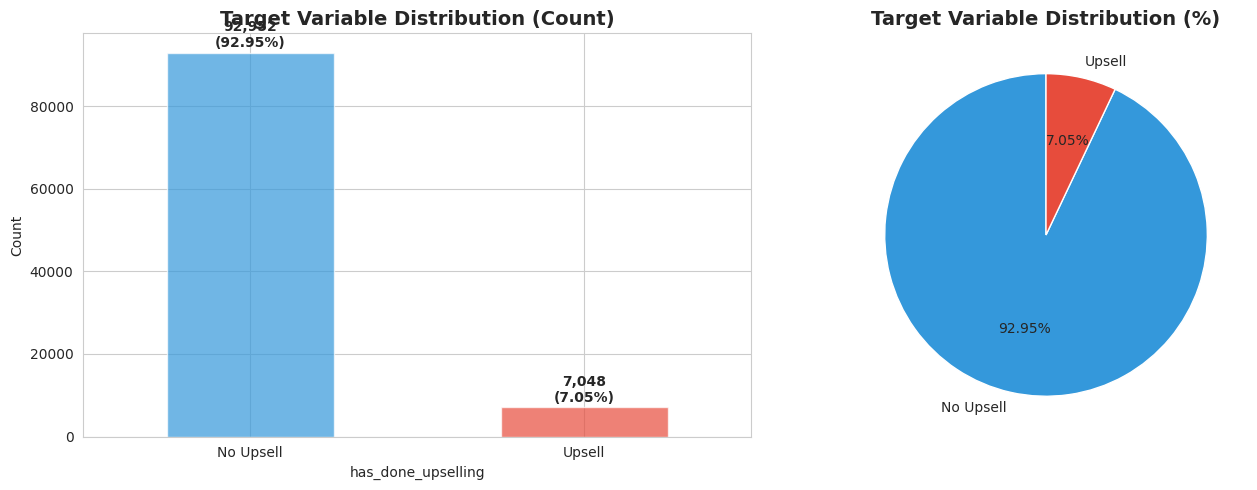

In [19]:

if core_data is not None:
    target_counts = core_data['has_done_upselling'].value_counts()
    target_pct = core_data['has_done_upselling'].value_counts(normalize=True)
    
    print(f"\nhas_done_upselling Distribution:")
    print(f"   No Upsell (0): {target_counts.get(0, 0):,} ({target_pct.get(0, 0):.2%})")
    print(f"   Upsell (1):    {target_counts.get(1, 0):,} ({target_pct.get(1, 0):.2%})")
    print(f"\nClass Imbalance Ratio: {target_counts.get(0, 0) / target_counts.get(1, 1):.1f}:1")
    
    # Visualize target distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    target_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'], alpha=0.7)
    axes[0].set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('has_done_upselling')
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(['No Upsell', 'Upsell'], rotation=0)
    for i, v in enumerate(target_counts):
        axes[0].text(i, v + 500, f'{v:,}\n({target_pct.iloc[i]:.2%})', 
                    ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    axes[1].pie(target_counts, labels=['No Upsell', 'Upsell'], autopct='%1.2f%%',
                colors=['#3498db', '#e74c3c'], startangle=90)
    axes[1].set_title('Target Variable Distribution (%)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


Descriptive Statistics:


,age,contract_lifetime_days,remaining_binding_days,gross_mrc
count,100000.00,100000.00,100000.00,100000.00
mean,43.87,780.87,-1.15,37.43
std,13.75,489.90,344.67,19.08
min,18.00,7.00,-730.00,5.00
25%,36.00,373.00,-235.00,20.92
50%,43.00,736.00,0.00,36.84
75%,49.00,1095.25,232.00,54.08
max,100.00,1825.00,730.00,70.00


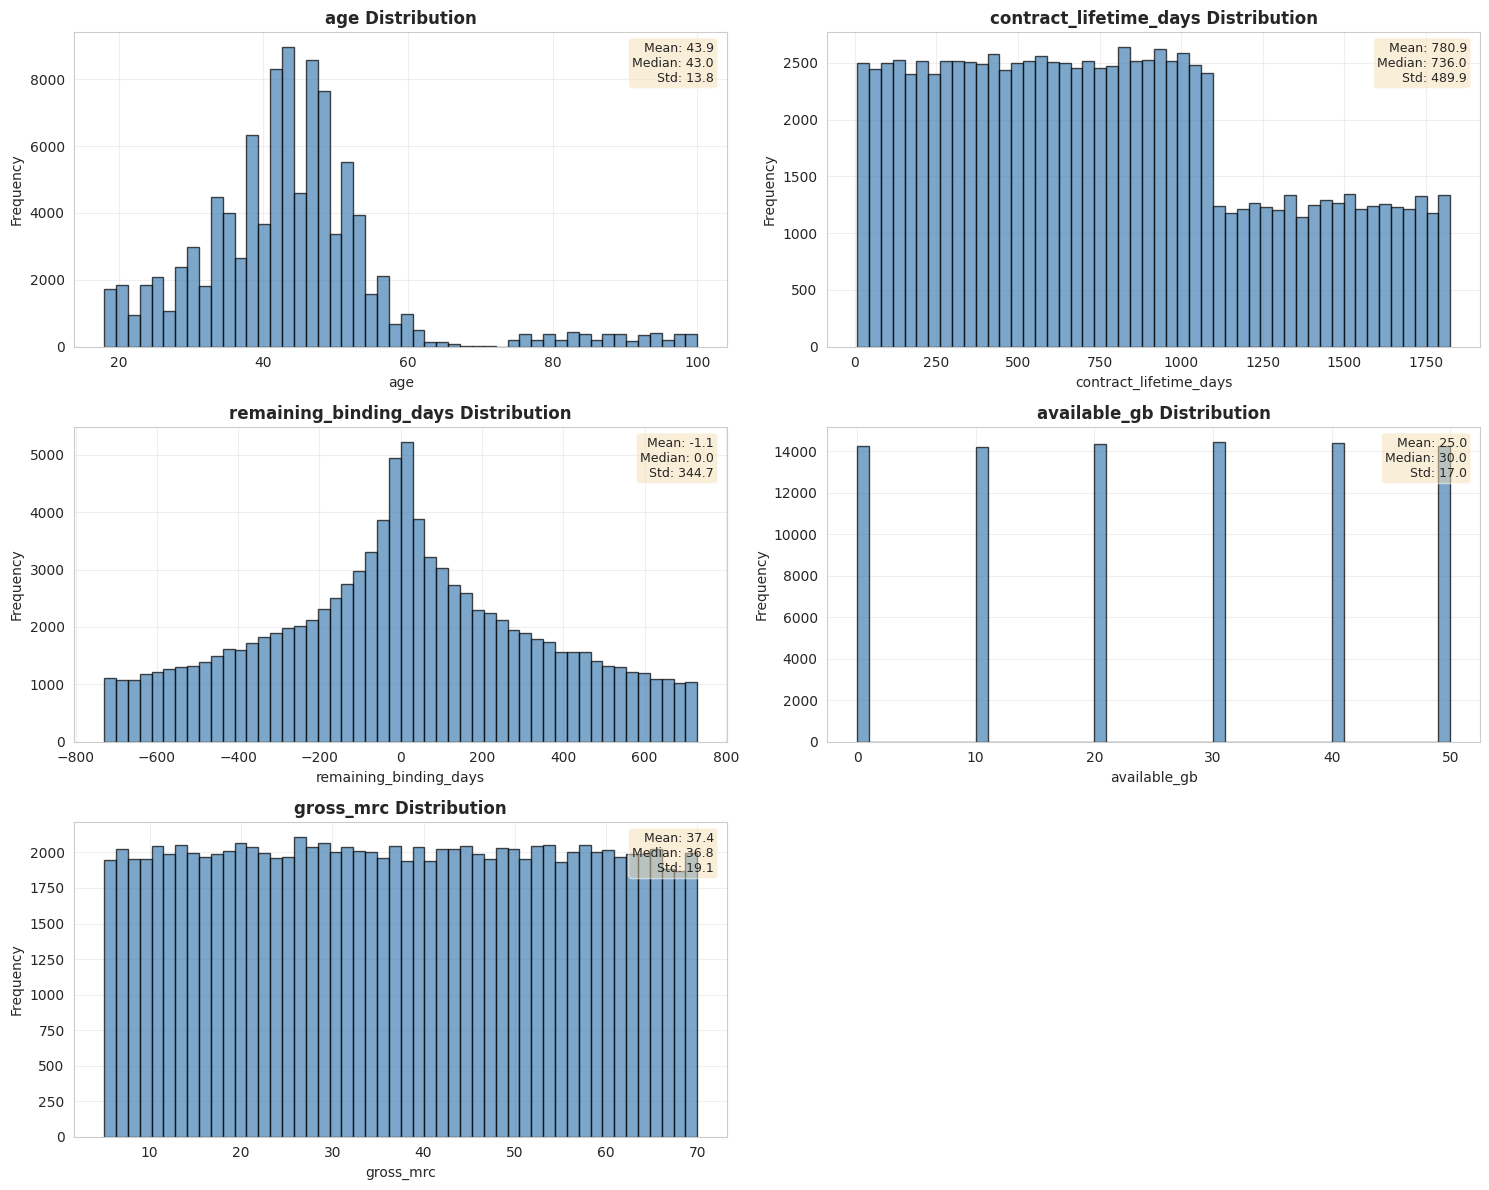

In [20]:

if core_data is not None:
    numerical_cols = ['age', 'contract_lifetime_days', 'remaining_binding_days', 
                      'available_gb', 'gross_mrc']
    
    print("\nDescriptive Statistics:")
    display(core_data[numerical_cols].describe().round(2))
    
    # Visualize distributions
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        data = core_data[col].dropna()
        
        axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)
        
        stats_text = f'Mean: {data.mean():.1f}\nMedian: {data.median():.1f}\nStd: {data.std():.1f}'
        axes[idx].text(0.98, 0.97, stats_text, transform=axes[idx].transAxes,
                      verticalalignment='top', horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=9)
    
    fig.delaxes(axes[5])
    
    plt.tight_layout()
    plt.show()

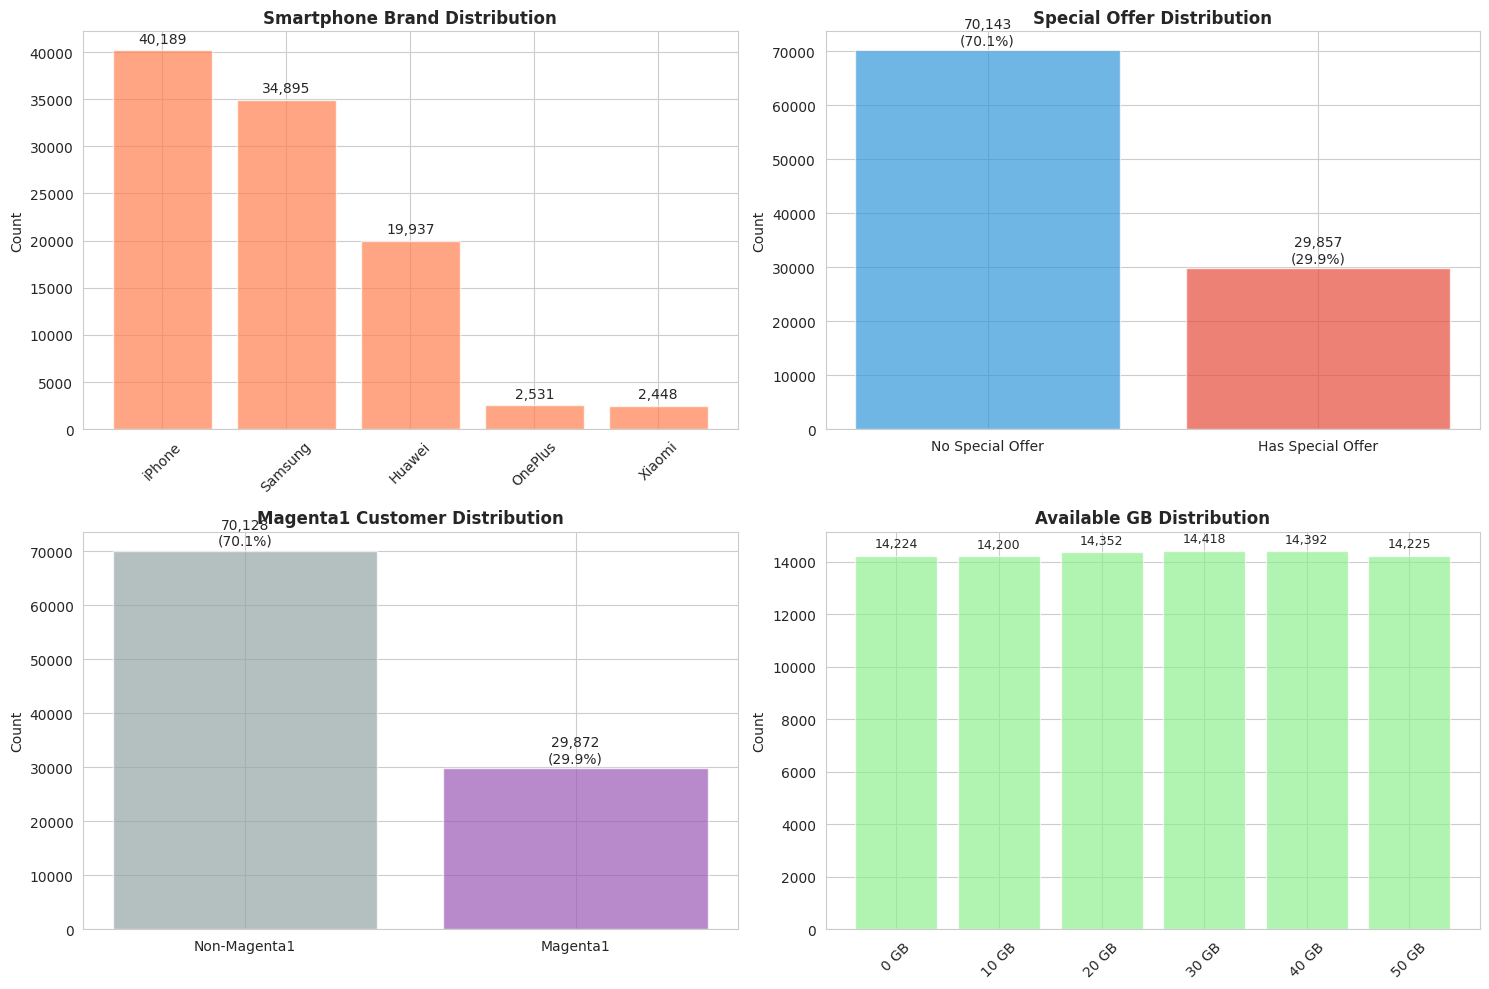

In [21]:

if core_data is not None:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Smartphone Brand
    brand_counts = core_data['smartphone_brand'].value_counts()
    axes[0, 0].bar(range(len(brand_counts)), brand_counts.values, color='coral', alpha=0.7)
    axes[0, 0].set_xticks(range(len(brand_counts)))
    axes[0, 0].set_xticklabels(brand_counts.index, rotation=45)
    axes[0, 0].set_title('Smartphone Brand Distribution', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Count')
    for i, v in enumerate(brand_counts.values):
        axes[0, 0].text(i, v + 500, f'{v:,}', ha='center', va='bottom')
    
    # Special Offer
    special_offer_counts = core_data['has_special_offer'].value_counts()
    axes[0, 1].bar(['No Special Offer', 'Has Special Offer'], special_offer_counts.values, 
                   color=['#3498db', '#e74c3c'], alpha=0.7)
    axes[0, 1].set_title('Special Offer Distribution', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Count')
    for i, v in enumerate(special_offer_counts.values):
        axes[0, 1].text(i, v + 500, f'{v:,}\n({v/len(core_data):.1%})', 
                       ha='center', va='bottom')
    
    # Magenta1 Customer
    magenta1_counts = core_data['is_magenta1_customer'].value_counts()
    axes[1, 0].bar(['Non-Magenta1', 'Magenta1'], magenta1_counts.values,
                   color=['#95a5a6', '#9b59b6'], alpha=0.7)
    axes[1, 0].set_title('Magenta1 Customer Distribution', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Count')
    for i, v in enumerate(magenta1_counts.values):
        axes[1, 0].text(i, v + 500, f'{v:,}\n({v/len(core_data):.1%})', 
                       ha='center', va='bottom')
    
    # Available GB
    gb_counts = core_data['available_gb'].value_counts().sort_index()
    axes[1, 1].bar(range(len(gb_counts)), gb_counts.values, color='lightgreen', alpha=0.7)
    axes[1, 1].set_xticks(range(len(gb_counts)))
    axes[1, 1].set_xticklabels([f'{int(x)} GB' if pd.notna(x) else 'NULL' 
                                 for x in gb_counts.index], rotation=45)
    axes[1, 1].set_title('Available GB Distribution', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Count')
    for i, v in enumerate(gb_counts.values):
        axes[1, 1].text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()


Correlations with has_done_upselling:
   is_magenta1_customer          :  0.0245
   contract_lifetime_days        :  0.0042
   has_special_offer             : -0.0015
   gross_mrc                     : -0.0265
   remaining_binding_days        : -0.0279
   age                           : -0.0346
   available_gb                  : -0.0563


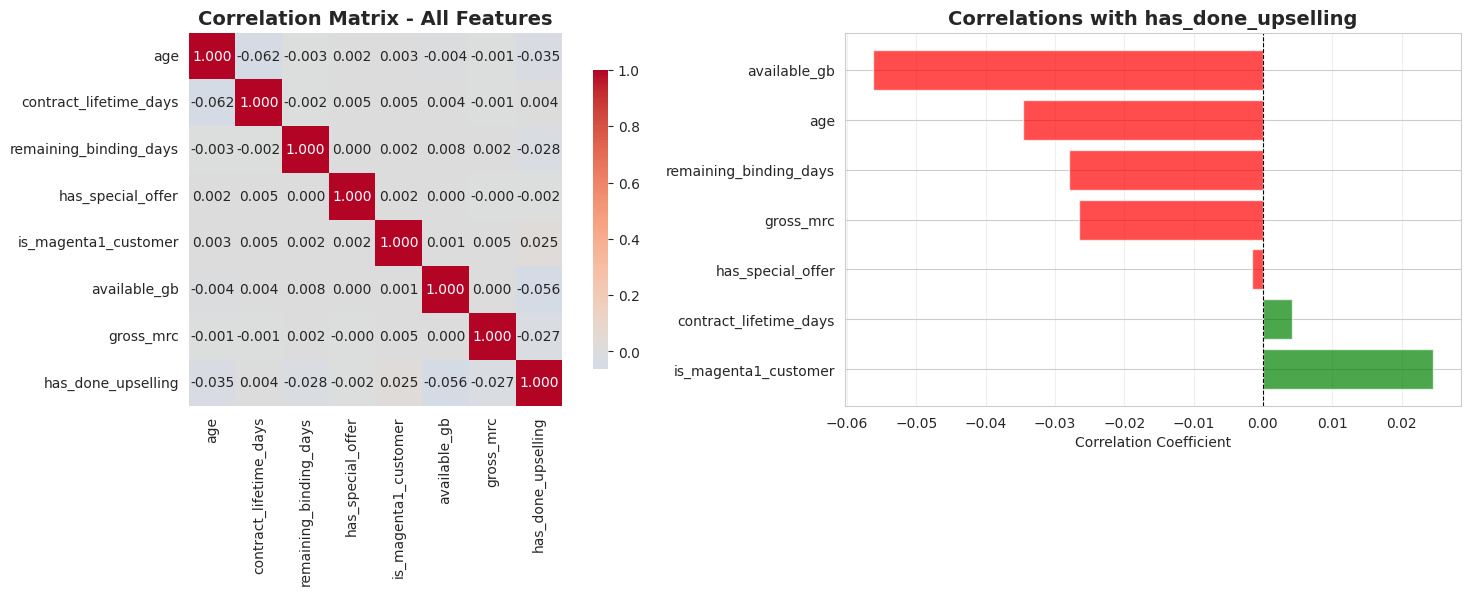

In [22]:

if core_data is not None:
    corr_cols = ['age', 'contract_lifetime_days', 'remaining_binding_days', 
                 'has_special_offer', 'is_magenta1_customer', 'available_gb', 
                 'gross_mrc', 'has_done_upselling']
    
    corr_data = core_data[corr_cols].dropna()
    correlation_matrix = corr_data.corr()
    
    target_corr = correlation_matrix['has_done_upselling'].sort_values(ascending=False)
    print("\nCorrelations with has_done_upselling:")
    for feat, corr in target_corr.items():
        if feat != 'has_done_upselling':
            print(f"   {feat:30s}: {corr:>7.4f}")
    
    # Visualize correlation matrix
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Full correlation heatmap
    sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, ax=axes[0], cbar_kws={'shrink': 0.8})
    axes[0].set_title('Correlation Matrix - All Features', fontsize=14, fontweight='bold')
    
    # Target correlations bar plot
    target_corr_plot = target_corr.drop('has_done_upselling')
    colors = ['red' if x < 0 else 'green' for x in target_corr_plot.values]
    axes[1].barh(range(len(target_corr_plot)), target_corr_plot.values, color=colors, alpha=0.7)
    axes[1].set_yticks(range(len(target_corr_plot)))
    axes[1].set_yticklabels(target_corr_plot.index)
    axes[1].set_xlabel('Correlation Coefficient')
    axes[1].set_title('Correlations with has_done_upselling', fontsize=14, fontweight='bold')
    axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()



Usage Statistics:


,used_gb,has_used_roaming
count,400000.000000,400000.000000
mean,14.002125,0.300092
std,18.658531,0.458299
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,15.000000,1.000000
max,70.000000,1.000000



Roaming Usage:
   No Roaming: 279,963 (70.0%)
   Used Roaming: 120,037 (30.0%)


/tmp/ipykernel_230307/2423684794.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([usage_info['used_gb'].dropna()], labels=['Used GB'])


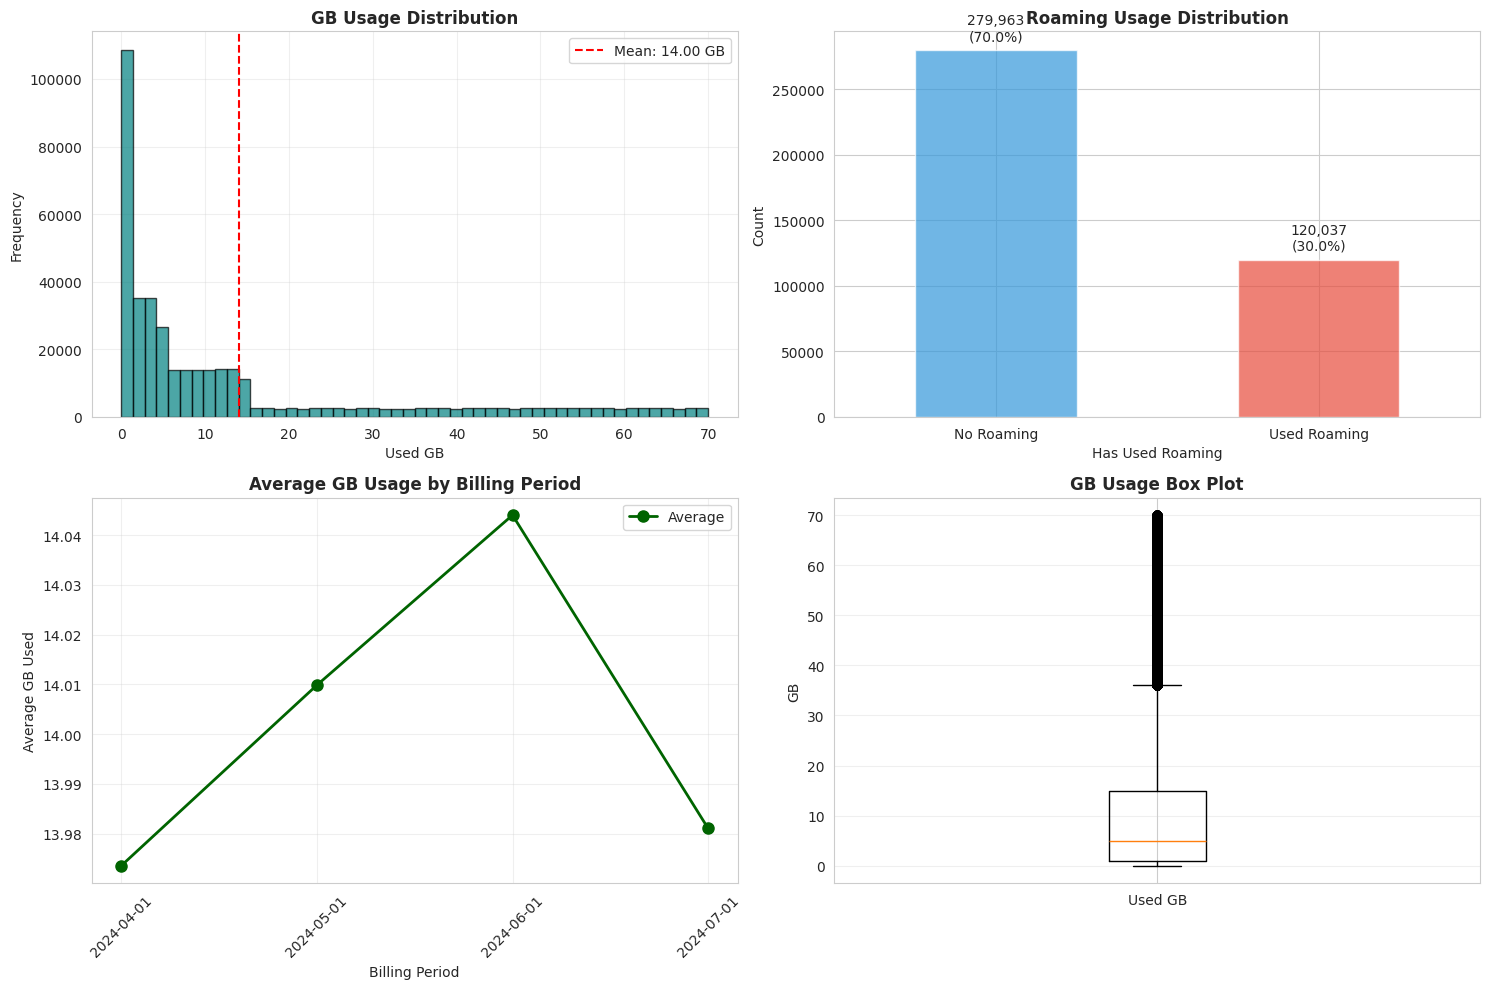

In [23]:

if usage_info is not None:
    print("\nUsage Statistics:")
    display(usage_info[['used_gb', 'has_used_roaming']].describe())
    
    roaming_dist = usage_info['has_used_roaming'].value_counts()
    print(f"\nRoaming Usage:")
    print(f"   No Roaming: {roaming_dist.get(0, 0):,} ({roaming_dist.get(0, 0)/len(usage_info):.1%})")
    print(f"   Used Roaming: {roaming_dist.get(1, 0):,} ({roaming_dist.get(1, 0)/len(usage_info):.1%})")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # GB Usage distribution
    axes[0, 0].hist(usage_info['used_gb'], bins=50, edgecolor='black', alpha=0.7, color='teal')
    axes[0, 0].set_title('GB Usage Distribution', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Used GB')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(usage_info['used_gb'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {usage_info["used_gb"].mean():.2f} GB')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Roaming usage
    roaming_dist.plot(kind='bar', ax=axes[0, 1], color=['#3498db', '#e74c3c'], alpha=0.7)
    axes[0, 1].set_title('Roaming Usage Distribution', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Has Used Roaming')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_xticklabels(['No Roaming', 'Used Roaming'], rotation=0)
    for i, v in enumerate(roaming_dist.values):
        axes[0, 1].text(i, v + 5000, f'{v:,}\n({v/len(usage_info):.1%})', 
                       ha='center', va='bottom')
    
    # GB Usage by billing period
    monthly_usage = usage_info.groupby('billed_period_month_d')['used_gb'].agg(['mean', 'sum'])
    axes[1, 0].plot(monthly_usage.index, monthly_usage['mean'], marker='o', linewidth=2, 
                   markersize=8, color='darkgreen', label='Average')
    axes[1, 0].set_title('Average GB Usage by Billing Period', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Billing Period')
    axes[1, 0].set_ylabel('Average GB Used')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Box plot of GB usage
    axes[1, 1].boxplot([usage_info['used_gb'].dropna()], labels=['Used GB'])
    axes[1, 1].set_title('GB Usage Box Plot', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('GB')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()


Interaction Statistics:


,n,days_since_last
count,63025.000000,63025.000000
mean,1.924871,90.086902
std,1.415140,52.262016
min,1.000000,0.000000
25%,1.000000,45.000000
50%,1.000000,90.000000
75%,2.000000,136.000000
max,10.000000,180.000000



Interaction Types:
   prolongation: 15,799
   rechnungsanfragen: 15,769
   produkte&services-tarifdetails: 15,735
   produkte&services-tarifwechsel: 15,722


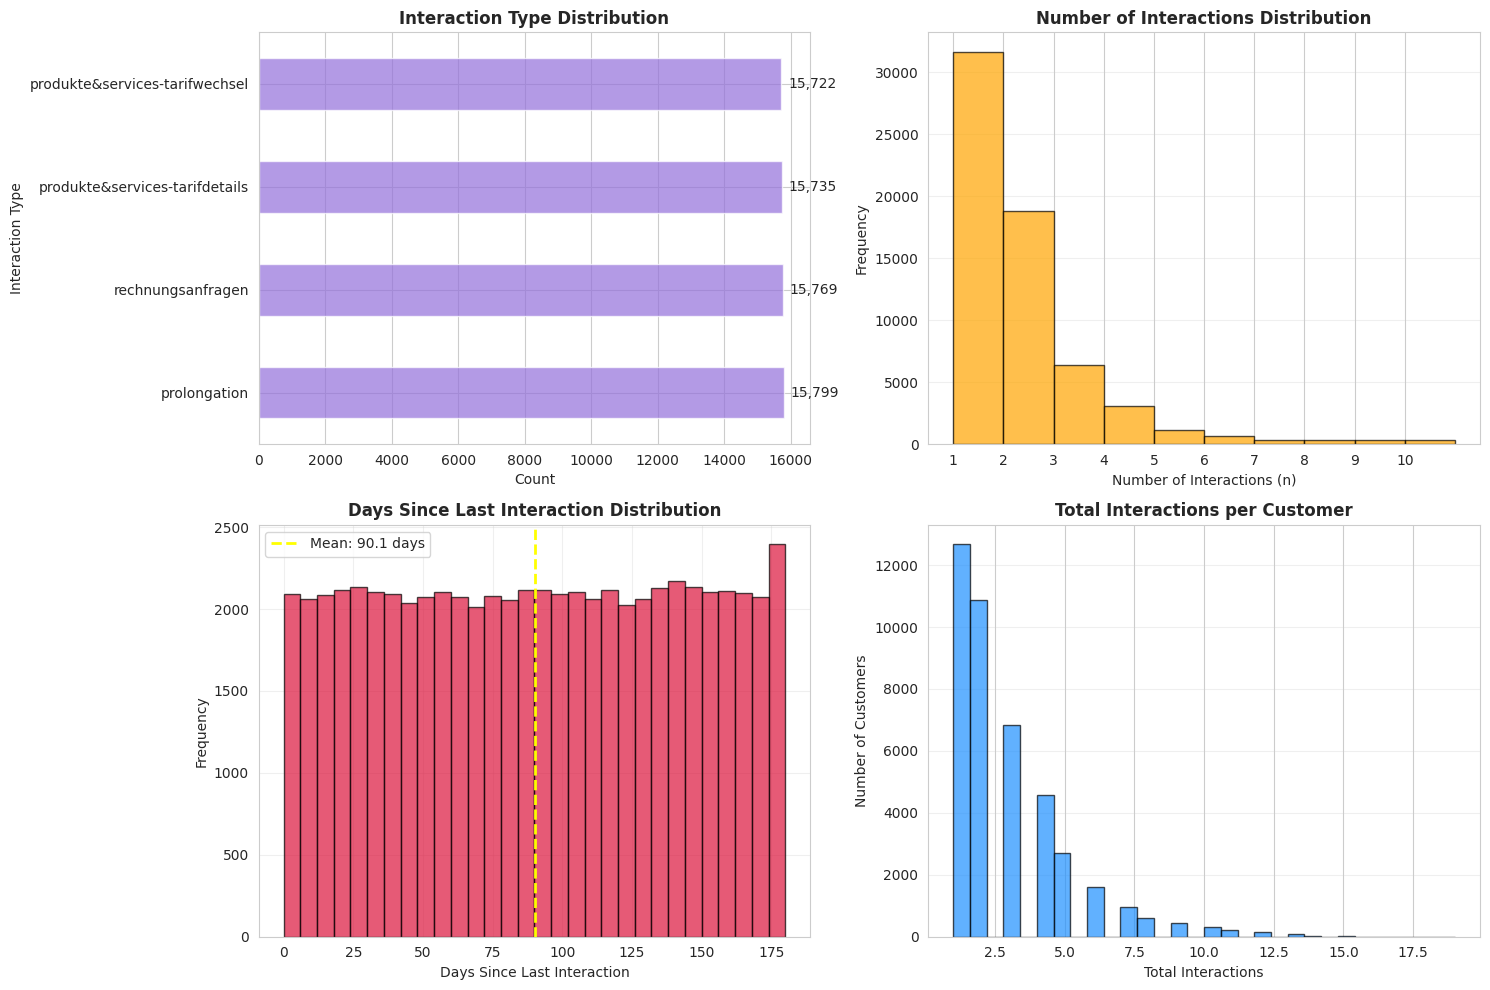

In [24]:

if customer_interactions is not None:
    print("\nInteraction Statistics:")
    display(customer_interactions[['n', 'days_since_last']].describe())
    
    print(f"\nInteraction Types:")
    type_counts = customer_interactions['type_subtype'].value_counts()
    for interaction_type, count in type_counts.items():
        print(f"   {interaction_type}: {count:,}")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Interaction type distribution
    type_counts.plot(kind='barh', ax=axes[0, 0], color='mediumpurple', alpha=0.7)
    axes[0, 0].set_title('Interaction Type Distribution', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Count')
    axes[0, 0].set_ylabel('Interaction Type')
    for i, v in enumerate(type_counts.values):
        axes[0, 0].text(v + 200, i, f'{v:,}', va='center')
    
    # Number of interactions distribution
    axes[0, 1].hist(customer_interactions['n'], bins=range(1, 12), 
                   edgecolor='black', alpha=0.7, color='orange')
    axes[0, 1].set_title('Number of Interactions Distribution', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Number of Interactions (n)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xticks(range(1, 11))
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Days since last interaction
    axes[1, 0].hist(customer_interactions['days_since_last'], bins=30, 
                   edgecolor='black', alpha=0.7, color='crimson')
    axes[1, 0].set_title('Days Since Last Interaction Distribution', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Days Since Last Interaction')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].axvline(customer_interactions['days_since_last'].mean(), 
                      color='yellow', linestyle='--', linewidth=2,
                      label=f'Mean: {customer_interactions["days_since_last"].mean():.1f} days')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Interactions per customer
    interactions_per_customer = customer_interactions.groupby('customer_id')['n'].sum()
    axes[1, 1].hist(interactions_per_customer, bins=30, edgecolor='black', 
                   alpha=0.7, color='dodgerblue')
    axes[1, 1].set_title('Total Interactions per Customer', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Total Interactions')
    axes[1, 1].set_ylabel('Number of Customers')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()



Upsell Rate by Age Group:


/tmp/ipykernel_230307/1913841953.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_upsell = core_data.groupby('age_group')['has_done_upselling'].agg(['mean', 'count'])
/tmp/ipykernel_230307/1913841953.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_upsell = core_data.groupby('contract_group')['has_done_upselling'].agg(['mean', 'count'])
/tmp/ipykernel_230307/1913841953.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

,mean,count
age_group,,
18-30,7.69%,"13,272"
31-45,8.41%,"46,430"
46-60,5.25%,"34,371"
60+,5.38%,"5,927"



Upsell Rate by Contract Lifetime:


,mean,count
contract_group,,
0-1yr,6.06%,"24,506"
1-2yr,7.62%,"25,111"
2-3yr,7.46%,"25,383"
3yr+,7.03%,"25,000"



Upsell Rate by Binding Status:


,mean,count
binding_status,,
Past binding,7.74%,"50,090"
0-6mo,6.48%,"20,891"
6-12mo,6.36%,"12,761"
12mo+,6.19%,"16,258"



Upsell Rate by Smartphone Brand:


,mean,count
smartphone_brand,,
Huawei,7.15%,"19,937"
OnePlus,6.84%,"2,531"
Samsung,6.92%,"34,895"
Xiaomi,6.33%,"2,448"
iPhone,7.17%,"40,189"



Upsell Rate by Available GB:


,mean,count
available_gb,,
0,8.89%,"14,224"
10,8.87%,"14,200"
20,8.79%,"14,352"
30,5.63%,"14,418"
40,5.58%,"14,392"
50,5.53%,"14,225"


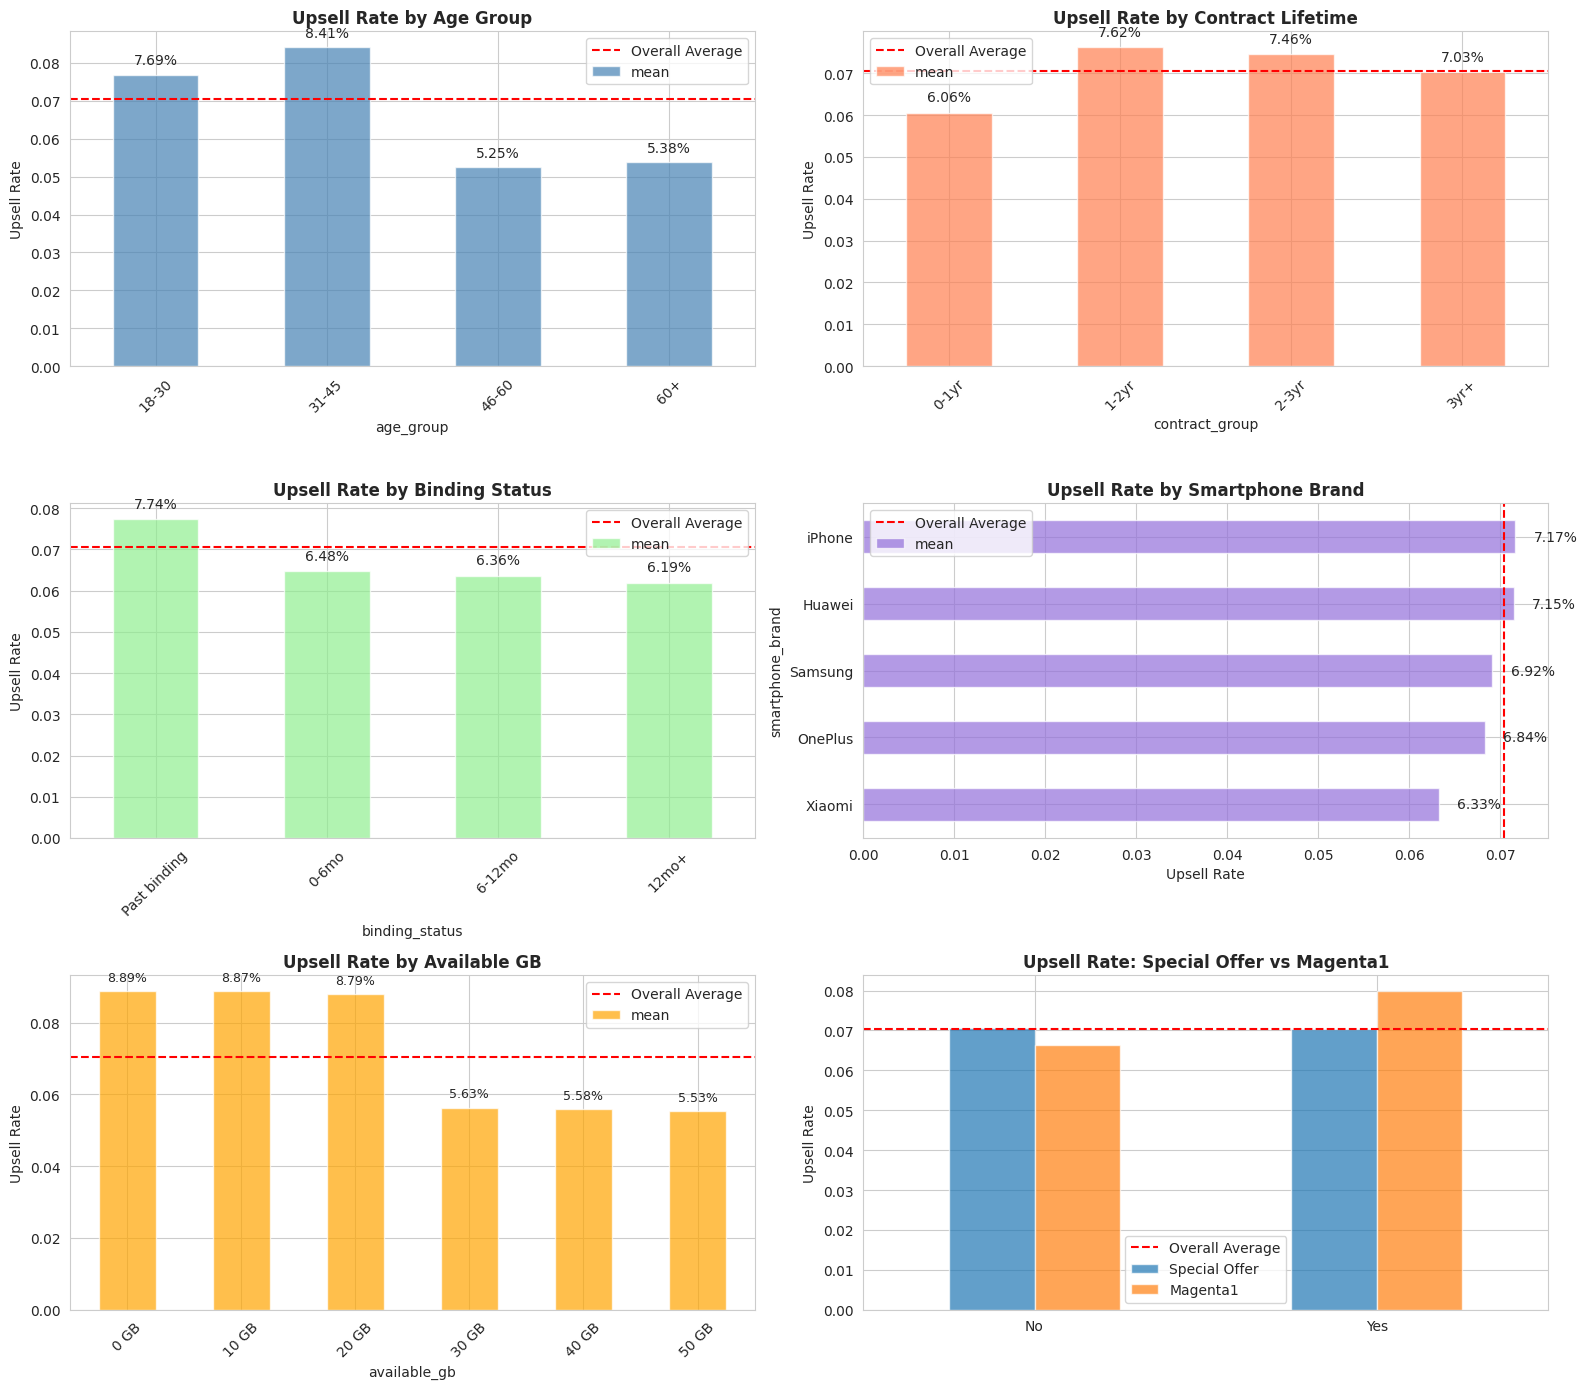

In [25]:

if core_data is not None:
    # Create segments
    core_data['age_group'] = pd.cut(core_data['age'], 
                                     bins=[0, 30, 45, 60, 100], 
                                     labels=['18-30', '31-45', '46-60', '60+'])
    
    core_data['contract_group'] = pd.cut(core_data['contract_lifetime_days'], 
                                          bins=[0, 365, 730, 1095, 5000], 
                                          labels=['0-1yr', '1-2yr', '2-3yr', '3yr+'])
    
    core_data['binding_status'] = pd.cut(core_data['remaining_binding_days'], 
                                          bins=[-1000, 0, 180, 365, 1000], 
                                          labels=['Past binding', '0-6mo', '6-12mo', '12mo+'])
    
    # Calculate upsell rates
    age_upsell = core_data.groupby('age_group')['has_done_upselling'].agg(['mean', 'count'])
    contract_upsell = core_data.groupby('contract_group')['has_done_upselling'].agg(['mean', 'count'])
    binding_upsell = core_data.groupby('binding_status')['has_done_upselling'].agg(['mean', 'count'])
    brand_upsell = core_data.groupby('smartphone_brand')['has_done_upselling'].agg(['mean', 'count'])
    gb_upsell = core_data.groupby('available_gb')['has_done_upselling'].agg(['mean', 'count'])
    special_offer_upsell = core_data.groupby('has_special_offer')['has_done_upselling'].agg(['mean', 'count'])
    magenta1_upsell = core_data.groupby('is_magenta1_customer')['has_done_upselling'].agg(['mean', 'count'])
    
    print("\nUpsell Rate by Age Group:")
    display(age_upsell.style.format({'mean': '{:.2%}', 'count': '{:,.0f}'}))
    
    print("\nUpsell Rate by Contract Lifetime:")
    display(contract_upsell.style.format({'mean': '{:.2%}', 'count': '{:,.0f}'}))
    
    print("\nUpsell Rate by Binding Status:")
    display(binding_upsell.style.format({'mean': '{:.2%}', 'count': '{:,.0f}'}))
    
    print("\nUpsell Rate by Smartphone Brand:")
    display(brand_upsell.style.format({'mean': '{:.2%}', 'count': '{:,.0f}'}))
    
    print("\nUpsell Rate by Available GB:")
    display(gb_upsell.style.format({'mean': '{:.2%}', 'count': '{:,.0f}'}))
    
    # Visualize segment analysis
    fig, axes = plt.subplots(3, 2, figsize=(16, 14))
    
    overall_avg = core_data['has_done_upselling'].mean()
    
    # Age groups
    age_upsell['mean'].plot(kind='bar', ax=axes[0, 0], color='steelblue', alpha=0.7)
    axes[0, 0].set_title('Upsell Rate by Age Group', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Upsell Rate')
    axes[0, 0].set_xticklabels(age_upsell.index, rotation=45)
    axes[0, 0].axhline(overall_avg, color='red', linestyle='--', label='Overall Average')
    axes[0, 0].legend()
    for i, v in enumerate(age_upsell['mean']):
        axes[0, 0].text(i, v + 0.002, f'{v:.2%}', ha='center', va='bottom')
    
    # Contract lifetime
    contract_upsell['mean'].plot(kind='bar', ax=axes[0, 1], color='coral', alpha=0.7)
    axes[0, 1].set_title('Upsell Rate by Contract Lifetime', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Upsell Rate')
    axes[0, 1].set_xticklabels(contract_upsell.index, rotation=45)
    axes[0, 1].axhline(overall_avg, color='red', linestyle='--', label='Overall Average')
    axes[0, 1].legend()
    for i, v in enumerate(contract_upsell['mean']):
        axes[0, 1].text(i, v + 0.002, f'{v:.2%}', ha='center', va='bottom')
    
    # Binding status
    binding_upsell['mean'].plot(kind='bar', ax=axes[1, 0], color='lightgreen', alpha=0.7)
    axes[1, 0].set_title('Upsell Rate by Binding Status', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Upsell Rate')
    axes[1, 0].set_xticklabels(binding_upsell.index, rotation=45)
    axes[1, 0].axhline(overall_avg, color='red', linestyle='--', label='Overall Average')
    axes[1, 0].legend()
    for i, v in enumerate(binding_upsell['mean']):
        axes[1, 0].text(i, v + 0.002, f'{v:.2%}', ha='center', va='bottom')
    
    # Smartphone brand
    brand_upsell['mean'].sort_values().plot(kind='barh', ax=axes[1, 1], color='mediumpurple', alpha=0.7)
    axes[1, 1].set_title('Upsell Rate by Smartphone Brand', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Upsell Rate')
    axes[1, 1].axvline(overall_avg, color='red', linestyle='--', label='Overall Average')
    axes[1, 1].legend()
    for i, v in enumerate(brand_upsell['mean'].sort_values()):
        axes[1, 1].text(v + 0.002, i, f'{v:.2%}', va='center')
    
    # Available GB
    gb_upsell['mean'].plot(kind='bar', ax=axes[2, 0], color='orange', alpha=0.7)
    axes[2, 0].set_title('Upsell Rate by Available GB', fontsize=12, fontweight='bold')
    axes[2, 0].set_ylabel('Upsell Rate')
    axes[2, 0].set_xticklabels([f'{int(x)} GB' if pd.notna(x) else 'NULL' 
                                for x in gb_upsell.index], rotation=45)
    axes[2, 0].axhline(overall_avg, color='red', linestyle='--', label='Overall Average')
    axes[2, 0].legend()
    for i, v in enumerate(gb_upsell['mean']):
        axes[2, 0].text(i, v + 0.002, f'{v:.2%}', ha='center', va='bottom', fontsize=9)
    
    # Special offer vs Magenta1
    comparison_data = pd.DataFrame({
        'Special Offer': special_offer_upsell['mean'],
        'Magenta1': magenta1_upsell['mean']
    })
    comparison_data.index = ['No', 'Yes']
    comparison_data.plot(kind='bar', ax=axes[2, 1], alpha=0.7)
    axes[2, 1].set_title('Upsell Rate: Special Offer vs Magenta1', fontsize=12, fontweight='bold')
    axes[2, 1].set_ylabel('Upsell Rate')
    axes[2, 1].set_xticklabels(['No', 'Yes'], rotation=0)
    axes[2, 1].axhline(overall_avg, color='red', linestyle='--', label='Overall Average')
    axes[2, 1].legend()
    
    plt.tight_layout()
    plt.show()

In [26]:

if core_data is not None:
    print("\nDATA CHARACTERISTICS:")
    print(f"   Total customers: {core_data['customer_id'].nunique():,}")
    print(f"   Total contracts: {len(core_data):,}")
    print(f"   Overall upsell rate: {core_data['has_done_upselling'].mean():.2%}")
    print(f"   Class imbalance: {(1-core_data['has_done_upselling'].mean())/core_data['has_done_upselling'].mean():.1f}:1")
    
    print("\nSTRONGEST CORRELATIONS WITH UPSELLING:")
    if data_exploration_summary is not None and 'target_correlations' in data_exploration_summary:
        target_corr = pd.Series(data_exploration_summary['target_correlations'])
        target_corr = target_corr[target_corr.index != 'has_done_upselling'].sort_values(ascending=False)
        for i, (feat, corr) in enumerate(target_corr.head(5).items()):
            print(f"   {i+1}. {feat}: {corr:.4f}")
    
    print("\nSEGMENTS WITH HIGHER UPSELL RATES:")
    segments = []
    
    if age_upsell['mean'].max() > overall_avg * 1.2:
        best_age = age_upsell['mean'].idxmax()
        segments.append(f"Age group {best_age}: {age_upsell['mean'].max():.2%}")
    
    if contract_upsell['mean'].max() > overall_avg * 1.2:
        best_contract = contract_upsell['mean'].idxmax()
        segments.append(f"Contract {best_contract}: {contract_upsell['mean'].max():.2%}")
    
    if binding_upsell['mean'].max() > overall_avg * 1.2:
        best_binding = binding_upsell['mean'].idxmax()
        segments.append(f"Binding status {best_binding}: {binding_upsell['mean'].max():.2%}")
    
    if brand_upsell['mean'].max() > overall_avg * 1.2:
        best_brand = brand_upsell['mean'].idxmax()
        segments.append(f"{best_brand} users: {brand_upsell['mean'].max():.2%}")
    
    if segments:
        for seg in segments:
            print(f"   {seg}")
    else:
        print("   No segments significantly above average (data is randomly generated)")



DATA CHARACTERISTICS:
   Total customers: 58,721
   Total contracts: 100,000
   Overall upsell rate: 7.05%
   Class imbalance: 13.2:1

STRONGEST CORRELATIONS WITH UPSELLING:
   1. is_magenta1_customer: 0.0241
   2. contract_lifetime_days: 0.0050
   3. has_special_offer: -0.0003
   4. gross_mrc: -0.0265
   5. remaining_binding_days: -0.0271

SEGMENTS WITH HIGHER UPSELL RATES:
   No segments significantly above average (data is randomly generated)
